In [8]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time
import itertools

In [2]:
os.getcwd()

'/Users/hyebin/Desktop/github/ML_study/1.회귀분석'

In [3]:
ploan = pd.read_csv('./data/Personal Loan.csv')
ploan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# 의미 없느 변수 제거
ploan_processed = ploan.dropna().drop(['ID', 'ZIP Code'], axis = 1)

In [9]:
# 상수항 추가
ploan_processed = sm.add_constant(ploan_processed, has_constant = 'add')
ploan_processed.head()

,const,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1.0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1.0,45,19,34,3,1.5,1,0,0,1,0,0,0
2,1.0,39,15,11,1,1.0,1,0,0,0,0,0,0
3,1.0,35,9,100,1,2.7,2,0,0,0,0,0,0
4,1.0,35,8,45,4,1.0,2,0,0,0,0,0,1


# 1. X, y 분리 및 학습데이터 테스트 데이터 분리

In [10]:
feature_columns = ploan_processed.columns.difference(['Personal Loan'])

X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

In [11]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify = y, train_size = 0.7, test_size = 0.3, random_state = 42)
# stratify = y : 학습 데이터와 테스트 데이터에 있는 클래스 비율이 원본 데이터셋과 동일하게 유지

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


# 2. 로지스틱회귀모형 모델링

In [13]:
model = sm.Logit(train_y, train_x)
results = model.fit(method = 'newton')

Optimization terminated successfully.
         Current function value: 0.131055
         Iterations 9


In [14]:
results.summary()
# Experience, Mortgage Pvalue 높음 -> 제거 고려

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Mon, 24 May 2021   Pseudo R-squ.:                  0.6030
Time:                        20:21:05   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [15]:
results.params

Age                    0.024471
CCAvg                  0.098468
CD Account             4.372577
CreditCard            -1.237447
Education              1.520329
Experience            -0.007032
Family                 0.757911
Income                 0.054695
Mortgage              -0.000133
Online                -0.440746
Securities Account    -1.852006
const                -13.920298
dtype: float64

In [16]:
np.exp(results.params) # 나이가 1살 많을수록 대출할 확률이 1.024배 높음

Age                   1.024773e+00
CCAvg                 1.103479e+00
CD Account            7.924761e+01
CreditCard            2.901239e-01
Education             4.573729e+00
Experience            9.929928e-01
Family                2.133814e+00
Income                1.056218e+00
Mortgage              9.998665e-01
Online                6.435563e-01
Securities Account    1.569221e-01
const                 9.005163e-07
dtype: float64

In [28]:
# y_hat 예측
pred_y = results.predict(test_x)
pred_y

1065    0.012968
487     0.023841
2157    0.001210
1765    0.196245
525     0.006610
          ...   
277     0.019982
914     0.959460
542     0.005239
32      0.011344
2360    0.084464
Length: 750, dtype: float64

In [29]:
def cut_off(y, threshold):
    Y = y.copy()
    Y[Y > threshold] = 1
    Y[Y <= threshold] = 0
    return Y.astype(int)

In [30]:
pred_Y = cut_off(pred_y, 0.5)
pred_Y

1065    0
487     0
2157    0
1765    0
525     0
       ..
277     0
914     1
542     0
32      0
2360    0
Length: 750, dtype: int64

In [31]:
# confusion matrix
cfmat = confusion_matrix(test_y, pred_Y)
print(cfmat)

[[661  12]
 [ 28  49]]


In [32]:
# accuracy 계산
(cfmat[0, 0] + cfmat[1, 1]) / len(pred_Y)

0.9466666666666667

In [33]:
def acc(cfmt):
    acc = (cfmt[0, 0] + cfmt[1, 1]) / (cfmt[0, 0] + cfmt[1, 1] + cfmt[0, 1] + cfmt[1, 0])
    return acc

In [34]:
acc(cfmat)

0.9466666666666667

# 3. 임계값에 따른 성능지표 비교

In [35]:
threshold = np.arange(0, 1, 0.1)
table = pd.DataFrame(columns = ['ACC'])

for i in threshold:
    pred_Y = cut_off(pred_y, i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] = acc(cfmat)

table.index.name = 'threshold'
table.columns.name = 'performance'

table # accuracy가 높은 0.5 ~ 0.7 사이의 threshold 설정하는 것이 좋을듯함

performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.933333
0.4,0.934667
0.5,0.946667
0.6,0.949333
0.7,0.946667
0.8,0.941333


AUC:  0.9463923891858513


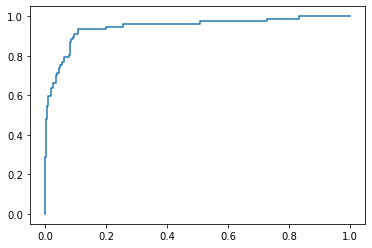

In [36]:
# ROC
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label = 1)

plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC: ', auc)

# 4. p-value 높은 2가지의 변수 제거

In [37]:
# Experience, Mortgage 변수 제거

feature_columns = list(ploan_processed.columns.difference(['Personal Loan', 'Experience', 'Mortgage']))

X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

In [38]:
train_x2, test_x2, train_y2, test_y2 = train_test_split(X, y, stratify = y, train_size = 0.7, test_size = 0.3, random_state = 42)
print(train_x2.shape, test_x2.shape, train_y2.shape, test_y2.shape)

(1750, 10) (750, 10) (1750,) (750,)


In [39]:
model = sm.Logit(train_y2, train_x2)
result2 = model.fit(method = 'newton')

Optimization terminated successfully.
         Current function value: 0.131062
         Iterations 9


In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1738
Method:                           MLE   Df Model:                           11
Date:                Mon, 24 May 2021   Pseudo R-squ.:                  0.6030
Time:                        20:41:53   Log-Likelihood:                -229.35
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                2.927e-142
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0245      0.102      0.240      0.810      -0.175       0.224
CCAvg                  0.0985      0.063      1.562      0.118      -0.025       0.222
CD Account             4.3726      0.568      7.703      0.000       3.260       5.485
CreditCard            -1.2374      0.337     -3.667      0.000      -1.899      -0.576
Education              1.5203      0.190      7.999      0.000       1.148       1.893
Experience            -0.0070      0.102     -0.069      0.945      -0.206       0.192
Family                 0.7579      0.128      5.914      0.000       0.507       1.009
Income                 0.0547      0.004     12.659      0.000       0.046       0.063
Mortgage              -0.0001      0.001     -0.144      0.885      -0.002       0.002
Online                -0.4407      0.263     -1.674      0.094      -0.957       0.075
Securities Account    -1.8520      0.561     -3.299      0.001      -2.952      -0.752
const                -13.9203      2.773     -5.021      0.000     -19.354      -8.486
======================================================================================
"""

In [40]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 1750
Model:                          Logit   Df Residuals:                     1740
Method:                           MLE   Df Model:                            9
Date:                Mon, 24 May 2021   Pseudo R-squ.:                  0.6029
Time:                        20:41:37   Log-Likelihood:                -229.36
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                3.817e-144
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0174      0.011      1.569      0.117      -0.004       0.039
CCAvg                  0.0997      0.062      1.596      0.111      -0.023       0.222
CD Account             4.3699      0.567      7.705      0.000       3.258       5.481
CreditCard            -1.2350      0.337     -3.668      0.000      -1.895      -0.575
Education              1.5249      0.187      8.156      0.000       1.158       1.891
Family                 0.7572      0.127      5.948      0.000       0.508       1.007
Income                 0.0546      0.004     12.833      0.000       0.046       0.063
Online                -0.4418      0.263     -1.678      0.093      -0.958       0.074
Securities Account    -1.8526      0.561     -3.302      0.001      -2.952      -0.753
const                -13.7465      1.164    -11.814      0.000     -16.027     -11.466
======================================================================================
"""

In [48]:
pred_y = result2.predict(test_x2)

In [49]:
pred_y2 = cut_off(pred_y, 0.5)

In [50]:
cfmat = confusion_matrix(test_y, pred_y2)
print(acc(cfmat))

0.944


In [51]:
threshold = np.arange(0, 1, 0.1)
table = pd.DataFrame(columns = ['ACC'])

for i in threshold:
    pred_Y = cut_off(pred_y, i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] = acc(cfmat)

table.index.name = 'threshold'
table.columns.name = 'performance'
table # threshold 0.6 부근에서 정확도 가장 높음

performance,ACC
threshold,
0.0,0.102667
0.1,0.908000
0.2,0.922667
0.3,0.932000
0.4,0.936000
0.5,0.944000
0.6,0.949333
0.7,0.946667
0.8,0.941333


AUC:  0.9465467667547905


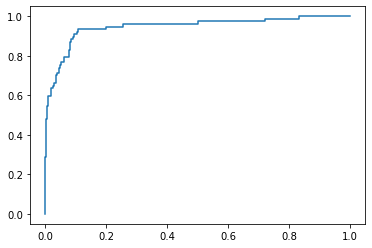

In [52]:
# ROC
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label = 1)

plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC: ', auc)

# 5. 변수선택법

In [53]:
feature_columns = list(ploan_processed.columns.difference(['Personal Loan']))

X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan']

In [54]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify = y, train_size = 0.7, test_size = 0.3, random_state = 42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1750, 12) (750, 12) (1750,) (750,)


In [55]:
def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)]) # 모델링
    regression = model.fit() # 모델 학습
    AIC = regression.aic # 모델의 aic
    return {'model': regression, 'AIC': AIC}

print(processSubset(X = train_x, y = train_y, feature_set = feature_columns[:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fee39f9ec70>, 'AIC': 331.1243840786674}


In [56]:
# step 1

def forward(X, y, predictors):
    
    # 데이터 변수들이 미리 정의된 predictors에 있는지 없는지 확인 및 분류
    # 즉 이미 선택된 변수들은 predictors에 들어있음
    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(X, y, predictors + [p] + ['const']))
    
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 모델 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print('Processed ', models.shape[0], 'models on ', len(predictors) + 1, 'predictors in ', toc - tic)
    print('Selected predictors: ', best_model['model'].model.exog_names, 'AIC: ', best_model['AIC'])
    return best_model


# 전진선택법 모델

def forward_model(X, y):
    Fmodels = pd.DataFrame(columns = ['AIC', 'model'])
    tic = time.time()
    
    # 미리 모델에 사용된 변수
    predictors = []
    
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X = X, y = y, predictors = predictors)
        
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
            
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]['model'].model.exog_names # 사용된 변수들을 가져옴
        Fmodel_before = Fmodels.loc[i]['AIC']
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print('Total elapsed time: ', toc - tic, 'seconds')
    
    return Fmodels['model'][len(Fmodels['model'])]        


# 처음에 모든 변수 넣은 모델 사용 후 점차 필요없는 변수 제거

def backward(X, y, predictors):
    tic = time.time()
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results. append(processSubset(X, y, list(combo) + ['const']))
        
    models = pd.DataFrame(results)
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print('Processed ', models.shape[0], 'models on ', len(predictors) - 1, 'predictors in ', toc - tic)
    print('Selected predictors: ', best_model['model'].model.exog_names, 'AIC: ', best_model['AIC'])
    return best_model


def backward_model(X, y):
    Bmodels = pd.DataFrame(columns = ['AIC', 'model'], index = range(1, len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X, y, predictors)['AIC']
    
    while len(predictors) > 1:
        Backward_result = backward(train_x, train_y, predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]['model'].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [k for k in predictors if k != 'const']
        
    toc = time.time()
    print('Total elapsed time: ', toc - tic, 'seconds')
    return Bmodels['model'].dropna().iloc[0]


def Stepwise_model(X, y):
    Stepmodels = pd.DataFrame(columns = ['AIC', 'model'])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X, y, predictors + ['const'])['AIC']
    
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X, y, predictors)
        print('forward')
        Stepmodels.loc[i] = Forward_result
        
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        Backward_result = backward(X, y, predictors)
        
        if Backward_result['AIC'] < Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]['model'].model.exog_names
            Smodel_before = Stepmodels.loc[i]['AIC']
            predictors = [k for k in predictors if k != 'const']
            print('backward')
        
        if Stepmodels.loc[i]['AIC'] > Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]['AIC']
            
    toc = time.time()
    print('Total elapsed time: ', toc - tic, 'seconds')
    return Stepmodels['model'][len(Stepmodels['model'])]

In [58]:
Forward_best_model = forward_model(train_x, train_y)

Processed  11 models on  1 predictors in  0.029294967651367188
Selected predictors:  ['Income', 'const'] AIC:  239.9207874222875
Processed  10 models on  2 predictors in  0.039750099182128906
Selected predictors:  ['Income', 'CD Account', 'const'] AIC:  92.75806832710532
Processed  9 models on  3 predictors in  0.03660106658935547
Selected predictors:  ['Income', 'CD Account', 'Education', 'const'] AIC:  -32.73874624530072
Processed  8 models on  4 predictors in  0.04068183898925781
Selected predictors:  ['Income', 'CD Account', 'Education', 'Family', 'const'] AIC:  -83.87480926714943
Processed  7 models on  5 predictors in  0.020400047302246094
Selected predictors:  ['Income', 'CD Account', 'Education', 'Family', 'Securities Account', 'const'] AIC:  -96.44896666582645
Processed  6 models on  6 predictors in  0.019928693771362305
Selected predictors:  ['Income', 'CD Account', 'Education', 'Family', 'Securities Account', 'CreditCard', 'const'] AIC:  -111.09343299897228
Processed  5 mode

In [59]:
Backward_best_model = backward_model(train_x, train_y)

Processed  11 models on  10 predictors in  0.0645132064819336
Selected predictors:  ['Age', 'CCAvg', 'CD Account', 'CreditCard', 'Education', 'Experience', 'Family', 'Income', 'Online', 'Securities Account', 'const'] AIC:  -110.71496504103197
Processed  10 models on  9 predictors in  0.229079008102417
Selected predictors:  ['CCAvg', 'CD Account', 'CreditCard', 'Education', 'Experience', 'Family', 'Income', 'Online', 'Securities Account', 'const'] AIC:  -112.07572514896128
Processed  9 models on  8 predictors in  0.07853007316589355
Selected predictors:  ['CCAvg', 'CD Account', 'CreditCard', 'Education', 'Family', 'Income', 'Online', 'Securities Account', 'const'] AIC:  -113.29446837263731
Processed  8 models on  7 predictors in  0.04093503952026367
Selected predictors:  ['CCAvg', 'CD Account', 'CreditCard', 'Education', 'Family', 'Income', 'Securities Account', 'const'] AIC:  -112.47797117459322
Total elapsed time:  0.44560885429382324 seconds


In [60]:
Stepwise_best_model = Stepwise_model(train_x, train_y)

Processed  11 models on  1 predictors in  0.03697776794433594
Selected predictors:  ['Income', 'const'] AIC:  239.9207874222875
forward
Processed  1 models on  0 predictors in  0.005235910415649414
Selected predictors:  ['const'] AIC:  789.479659173553
Processed  10 models on  2 predictors in  0.030369043350219727
Selected predictors:  ['Income', 'CD Account', 'const'] AIC:  92.75806832710532
forward
Processed  2 models on  1 predictors in  0.008553028106689453
Selected predictors:  ['Income', 'const'] AIC:  239.9207874222875
Processed  9 models on  3 predictors in  0.03363990783691406
Selected predictors:  ['Income', 'CD Account', 'Education', 'const'] AIC:  -32.73874624530072
forward
Processed  3 models on  2 predictors in  0.012565851211547852
Selected predictors:  ['Income', 'CD Account', 'const'] AIC:  92.75806832710532
Processed  8 models on  4 predictors in  0.0384821891784668
Selected predictors:  ['Income', 'CD Account', 'Education', 'Family', 'const'] AIC:  -83.87480926714943

In [61]:
pred_y_full = results.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [62]:
pred_Y_full = cut_off(pred_y_full, 0.5) 
pred_Y_forward = cut_off(pred_y_forward, 0.5) 
pred_Y_backward = cut_off(pred_y_backward, 0.5) 
pred_Y_stepwise = cut_off(pred_y_stepwise, 0.5) 

In [63]:
cfmat_full = confusion_matrix(test_y, pred_Y_full)
cfmat_forward = confusion_matrix(test_y, pred_Y_forward)
cfmat_backward = confusion_matrix(test_y, pred_Y_backward)
cfmat_stepwise = confusion_matrix(test_y, pred_Y_stepwise)

In [66]:
print(len(results.model.exog_names))
print(len(Forward_best_model.model.exog_names))
print(len(Backward_best_model.model.exog_names))
print(len(Stepwise_best_model.model.exog_names))

12
9
9
9


In [64]:
print(acc(cfmat_full))
print(acc(cfmat_forward))
print(acc(cfmat_backward))
print(acc(cfmat_stepwise))

0.9466666666666667
0.932
0.932
0.932


AUC:  0.9463923891858513


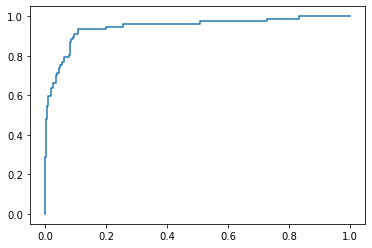

In [67]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_full, pos_label = 1)
plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC: ', auc)

AUC:  0.9498079928986319


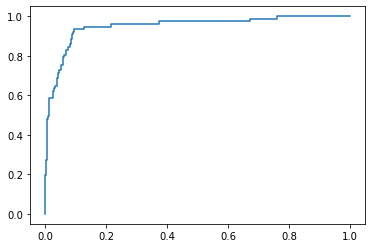

In [69]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_forward, pos_label = 1)
plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC: ', auc)

AUC:  0.9498079928986319


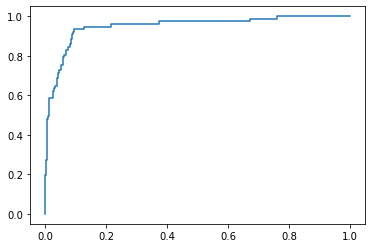

In [70]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_backward, pos_label = 1)
plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC: ', auc)

AUC:  0.9498079928986319


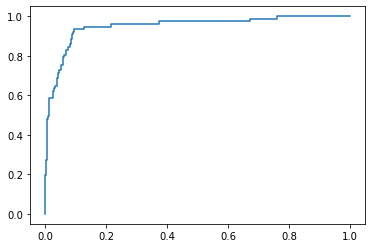

In [71]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y_stepwise, pos_label = 1)
plt.plot(fpr, tpr)

auc = np.trapz(tpr, fpr)
print('AUC: ', auc)